# Contexto Comercial

Unos de los problemas mas comunes en los bancos son los ‘clientes fugados’, estos son aquellos que tienen una cuenta en el banco pero por alguna razón dejan de realizar operaciones o dejan de utilizar las tarjetas del mismo.

Por eso el gerente del banco Provincia se puso en contacto con nosotros, para que creemos un modelo que pueda lograr una estimación de si un cliente se va a fugar o no para así poder generar campañas para evitar que el cliente se fuge.

Nuestros objetivos a cumplir son:
1. Identificar y visualizar cuales son los factores que contribuyen al abandono de los clientes.

2. Construir un modelo de predicción que asigne una probabilidad de abandono a cada cliente para así poder abordarlo y tratar de que cambie de opinión, con promociones o con una mejora del servicio.

# Preguntas

- ¿Cuántas cuentas hay activas? ¿Cuántas cerradas?

- ¿Cual es el monto máximo de crédito otorgado? ¿El mínimo?

- ¿Que rango de edad tienen los clientes?

- ¿Hay alguna relación entre los pedidos de crédito y los ingresos anuales de los clientes?

- ¿Hay alguna relación entre el tipo de tarjeta que poseen y el tiempo que llevan en el banco?

- Hay datos marcados como ‘Unknow’ en los ingresos de los clientes ¿A que se debe? 

# Diccionario de datos

CLIENTNUM: Numero unico identificador del cliente.

Attrition_Flag: Actividad del cliente, si la cuenta esta cerrada vale 1 sino 0.

Customer_Age: Edad del cliente.

Gender: Genero del cliente.

Dependent_count: Variable demografica, numero de dependencias.

Education_Level: Nivel de educacion maxima alcanzada del cliente.

Marital_Status: Estado civil del cliente. (casado/a, soltero/a, desconocido)

Income_Category: Ingresos anuales del cliente (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, >)

Card_Category: Tipo de tarjeta que tiene el cliente (Blue, Silver, Gold, Platinum)

Monthsonbook: Periodo de relacion con el banco.

TotalRelationshipcount: Numero total de productos mantenidos por el cliente

MonthsInactive12_mon: N° de meses inactivos en los ultimos 12 meses.

ContactsCount12_mon: N° de contactos en los ultimos 12 meses.

Credit_Limit: Limite de la tarjeta de credito.

TotalRevolvingBal: Saldo rotatorio total en la tarjeta de credito

AvgOpenTo_Buy: Disponibilidad de comprar una linea de credito (porcentaje de los ultimos 12 meses)

TotalAmtChngQ4Q1: Cambio en el monto de la transacción (Q4 over Q1)

TotalTransAmt: Importe total de las transacciones (Ultimos 12 meses)

TotalTransCt: Recuento total de transacciones (Ultimos 12 meses)

TotalCtChngQ4Q1: Cambio en el monto de la transacción (Q4 over Q1)

AvgUtilizationRatio: Ratio de uso medio de la tarjeta.

NaiveBayesClassifier_attribution Naive Bayes: Clasificador bayesiano ingenuo.

# Configuración de dataset y líbrerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler,LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
banco = pd.read_csv('Banco.csv')

In [ ]:
banco.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Data Wrangling

In [ ]:
banco.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
banco.duplicated().sum()

0

In [ ]:
banco.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


# Exploratory Data Analisys (EDA)

 ¿Cuantas cuentas hay activas? ¿Como se dividen entre generos?

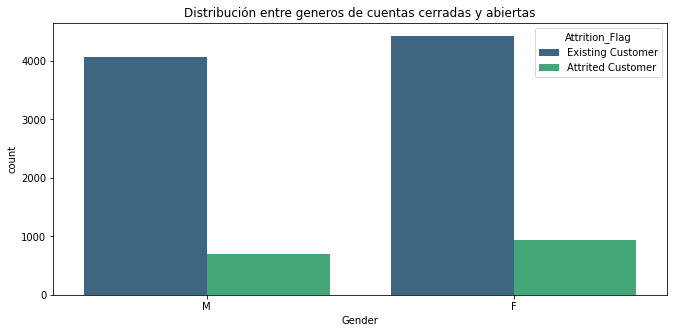

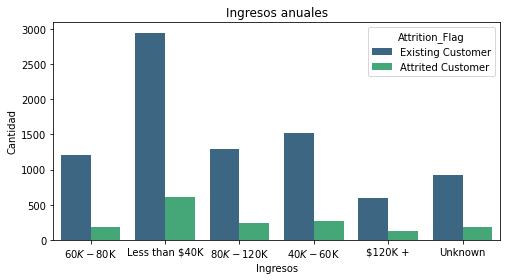

In [ ]:
fig, ax = plt.subplots(figsize=(11,5))
sns.countplot(x='Gender', hue='Attrition_Flag', palette='viridis', data=banco)
plt.title("Distribución entre generos de cuentas cerradas y abiertas")
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(banco['Income_Category'], hue= banco["Attrition_Flag"], palette='viridis')
ax.set_title('Ingresos anuales')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Ingresos')
plt.show()

- La mayoria de los clientes tiene un ingreso menor a $40 K, esto nos puede dar un indicio de que al tener menores ingresos, solicitan mas creditos

¿Cuanto tiempo hace que son clientes en el banco?

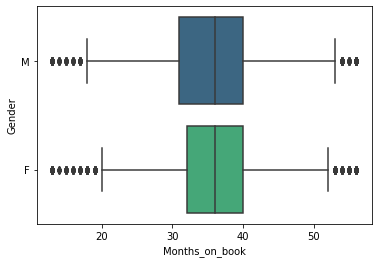

In [ ]:
sns.boxplot(x="Months_on_book", y="Gender", data=banco, palette = 'viridis')
plt.show()

- Podemos observar que la mayoria de clientes estan hace mas de 30 años en el banco.

Text(0.5, 0, 'Edad')

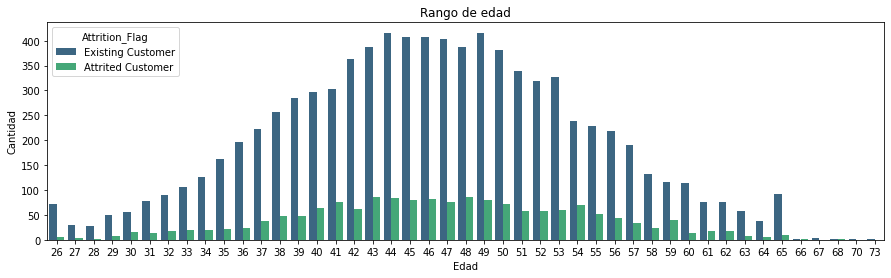

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot("Customer_Age",hue="Attrition_Flag",data=banco, palette = 'viridis')
ax.set_title('Rango de edad')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Edad')

- Podemos ver que en el rango de 37 y 55 años son los que mas abandonan el banco, tal vez reciben mejores ofertas de otros bancos.

- Hay pocos clientes mayores de 73 años, tal vez podriamos tener un paquete de ofertas para las personas mayores.

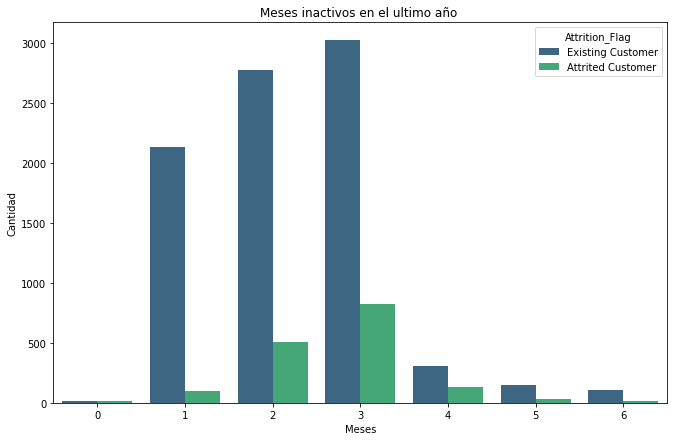

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
sns.countplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', data=banco, palette = 'viridis')
plt.title("Meses inactivos en el ultimo año ")
ax.set_ylabel('Cantidad')
ax.set_xlabel('Meses')
plt.show()

- Podemos observar que la mayoria de clientes estuvieron inactivos durante 3 meses, incluso algunos con la cuenta ya cerrada.

- Propongo abordar al cliente en la etapa de 3 meses de inactividad para saber porque esta inactivo y si piensa en cerrar su cuenta.

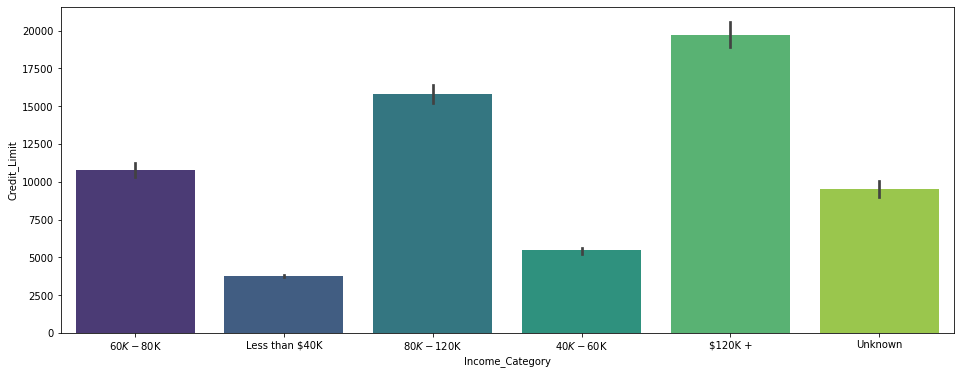

In [ ]:
fig = plt.subplots(1, figsize=(16,6))
sns.barplot(data=banco, x='Income_Category', y='Credit_Limit', palette = "viridis" )
plt.show()

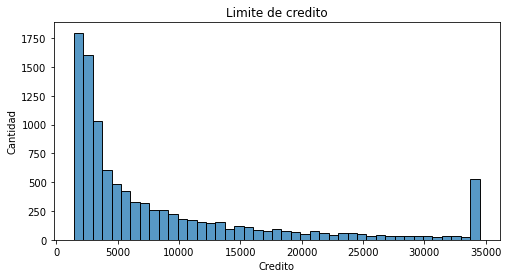

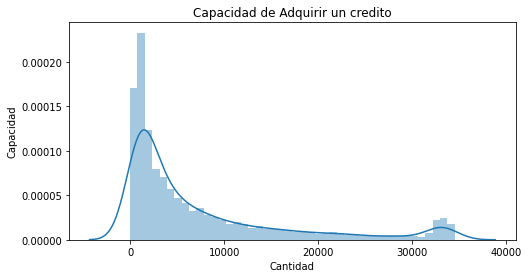

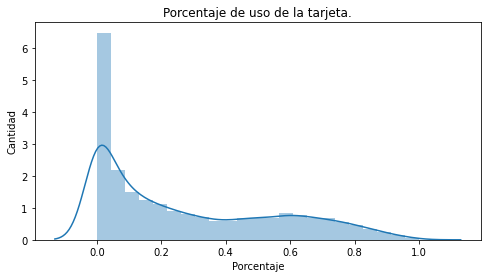

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data= banco, x="Credit_Limit")
ax.set_title('Limite de credito')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Credito')

fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(banco['Avg_Open_To_Buy'])
ax.set_title('Capacidad de Adquirir un credito')
ax.set_ylabel('Capacidad')
ax.set_xlabel('Cantidad')
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(banco['Avg_Utilization_Ratio'])
ax.set_title('Porcentaje de uso de la tarjeta.')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Porcentaje')
plt.show()


- Los cliente que mas usan la tarjeta representan menos del 20% del total y estos son los que menos capacidad tiene de adquirir un credito.

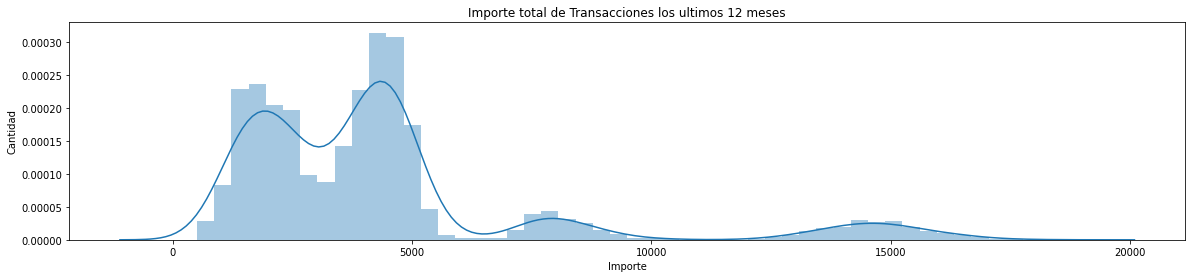

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
sns.distplot(banco["Total_Trans_Amt"])#, palette='viridis')
ax.set_title('Importe total de Transacciones los ultimos 12 meses')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Importe')
plt.show()

# Correlación

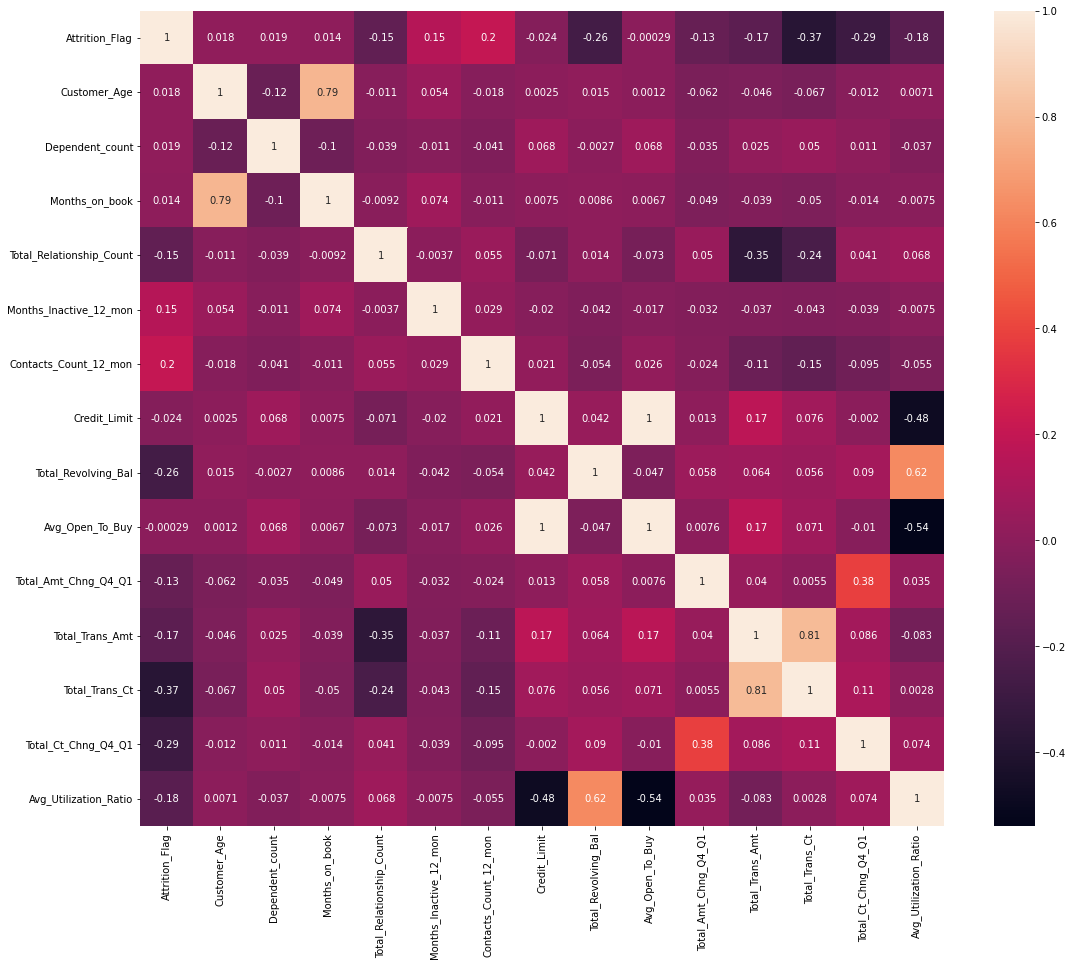

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(banco.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1).corr(), annot=True)
plt.show()

El límite de credito se encuentra mayormente relacionado con la posibilidad de comprar.
 El tiempo que lleva un cliente en el banco esta bastante relacionado con su edad.



# Modelado de Datos

In [ ]:
datos = ["Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Credit_Limit"] 
datos= banco[datos]

# Para la fase de 'Encoding' voy a usar: "GetDummies" 

In [ ]:
banco['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)

In [ ]:
y = datos["Attrition_Flag"]
X = datos.drop("Attrition_Flag", axis =1)

X = pd.get_dummies(X, columns=["Education_Level","Marital_Status","Income_Category","Card_Category","Gender"])
X.head()

,Customer_Age,Dependent_count,Credit_Limit,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,45,3,12691.0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,49,5,8256.0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,51,3,3418.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,40,4,3313.0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,40,3,4716.0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80 % para entrenar y 20 % para testear

print(f'X_train shape:',X_train.shape)
print(f'X_test shape:',X_test.shape)

X_train shape: (8101, 26)
X_test shape: (2026, 26)


# Modelos de Clasificación

# Regresion Logística

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
Regresion_Log = LogisticRegression(max_iter=10000, n_jobs=-1, class_weight='balanced')

Regresion_Log.fit(X_train, y_train)

y_pred_RL = Regresion_Log.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_RL))

              precision    recall  f1-score   support

           0       0.16      0.73      0.27       327
           1       0.84      0.28      0.42      1699

    accuracy                           0.35      2026
   macro avg       0.50      0.50      0.34      2026
weighted avg       0.73      0.35      0.39      2026



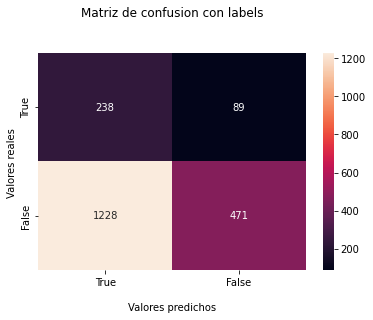

In [ ]:
Reg_mat = confusion_matrix(y_test, Regresion_Log.predict(X_test))
ax = sns.heatmap(Reg_mat, annot=True, fmt="g")
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

No es un buen modelo, tiene un 35% de accuracy

# Random Forest

In [ ]:
random_forest= RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced", max_features="log2")

random_forest.fit(X_train, y_train)

y_pred_RF = random_forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_RF))

                   precision    recall  f1-score   support

Attrited Customer       0.16      0.04      0.07       327
Existing Customer       0.84      0.96      0.89      1699

         accuracy                           0.81      2026
        macro avg       0.50      0.50      0.48      2026
     weighted avg       0.73      0.81      0.76      2026



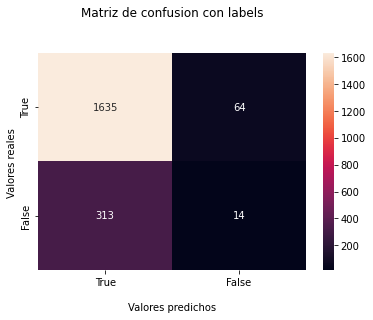

In [ ]:
ran_for = confusion_matrix(y_test, random_forest.predict(X_test))
ax = sns.heatmap(ran_for, annot=True, fmt="g")
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

Este modelo cuenta con un 81 % de acurracy 

Nos vamos a quedar con el modelo de 'Random Forest' a pesar de que tenga un poco menos de accuracy rinde mejor en la matriz de confusión.

# Stratified- K fold (clasificacion) - Random Forest

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# split() metodo que genera indices para separar la data de entrenamiento y la de prueba.

skf.get_n_splits(X, y)

10

In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= skf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

print(f'Average score: {"{:.2f}".format(score.mean())}')

Average score(50): 0.820
Average score(100): 0.820
Average score(150): 0.820
Average score(200): 0.821
Average score(250): 0.822
Average score(300): 0.822
Average score(350): 0.823
Average score: 0.82


# XGBoost

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
clasificador_xgb = xgb.XGBClassifier(n_estimators=10,seed=42,max_depth=20, learning_rate=0.1)

clasificador_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_test_pred = clasificador_xgb.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.27      0.04      0.07       327
           1       0.84      0.98      0.90      1699

    accuracy                           0.83      2026
   macro avg       0.55      0.51      0.49      2026
weighted avg       0.75      0.83      0.77      2026



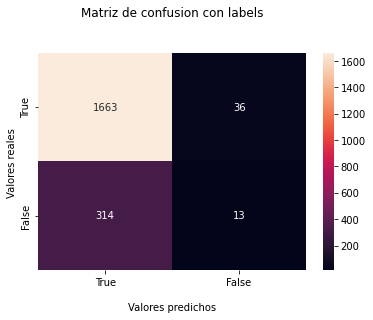

In [ ]:
xgboost = confusion_matrix(y_test, clasificador_xgb.predict(X_test))
ax = sns.heatmap(xgboost, annot=True, fmt="g")
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

# Randomized Search CV - XGBoost

---



In [ ]:
params_grid = {
        'min_child_weight': [1, 5, 10,15,20],
        'gamma': [0.5, 1, 1.5, 2, 3,5,7.5],
        'subsample': [0.6, 0.8, 1.0,1.5],
        'colsample_bytree': [0.6, 0.8, 1.0,1.5],
        'max_depth': [1,5,6,7,10,15,20]
        }

In [ ]:
grid_cv = RandomizedSearchCV(clasificador_xgb, params_grid, scoring="accuracy", n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("Mejores parametros", grid_cv.best_params_)
print('\n')
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 1.0, 'min_child_weight': 15, 'max_depth': 10, 'gamma': 2, 'colsample_bytree': 0.8}


Mejor score de CV 0.8395259746688906
Accuracy del modelo = 0.8386


# Conclusión

- Calculando el accuracy vemos que XGBoost y Random Forest son los que ofrecen los mejores resultados. Elegimos XGBoost porque tiene el accuracy más alto brindándonos una mejor predicción en las personas que abandonaran o no.

- Con los datos obtenidos en el presente notebook nos van a servir para hacer diferentes campanias de marketing dependiendo del perfil del usuario como tambien mejorar las ya ofrecidas a clientes actuales o a clientes nuevos.

- Podemos concluir también que al implementar la solución ofrecida, el banco se beneficiaría en una reducción de costos en las campañas que no se orientan al tipo de usuario adecuado, sino que también sería redituable a nivel de ingresos, ya que al mejorar la eficiencia de las campañas también puede orientarse a captar nuevos clientes.

# Futuras lineas

- Para seguir mejorando el proyecto se pueden usar métodos en Feature selection, un método exhaustivo por ejemplo. Para comparar la relevancia de los features y de allí elegir los mejores según los métodos empleados.

- Se podría generar categorización de perfiles de forma automática para clientes existentes o nuevos.

- Para que el modelo sea más robusto y no esté sesgado solo a un caso de negocio, podriamos utilizar datasets de otros bancos para ver como impactaron en los ingresos.

- Implementar una estrategia de Marketing para lograr que mas clientes tengan la tarjeta de tipo 'Platinum'.

- Solucionar el error en la base de datos de clientes con el ingreso 'Unknown'.